# Explore here

In [3]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from imblearn.metrics import specificity_score

In [4]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    train_auc = roc_auc_score(y_train, y_train_prob, multi_class='ovr')
    train_precision = precision_score(y_train, y_pred_train, average='weighted')
    train_recall = recall_score(y_train, y_pred_train, average='weighted')
    train_specificity = specificity_score(y_train, y_pred_train, average='weighted')

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    test_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_specificity = specificity_score(y_test, y_pred_test, average='weighted')

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# Quedarse con las columnas Latitude, Longitude, MedInc
df = data[['Latitude', 'Longitude', 'MedInc']]

In [7]:
# Dividir en train y test
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 42)

X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


In [8]:
# clasificar en 6 clusters
k_model = KMeans(n_clusters = 6, random_state=42)
k_model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [9]:
k_model.labels_

array([3, 1, 1, ..., 3, 0, 5], shape=(16512,), dtype=int32)

In [10]:
# Almacenar clusters como columnas
y_train = (k_model.labels_)
X_train['cluster'] = y_train
X_train.head()


,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


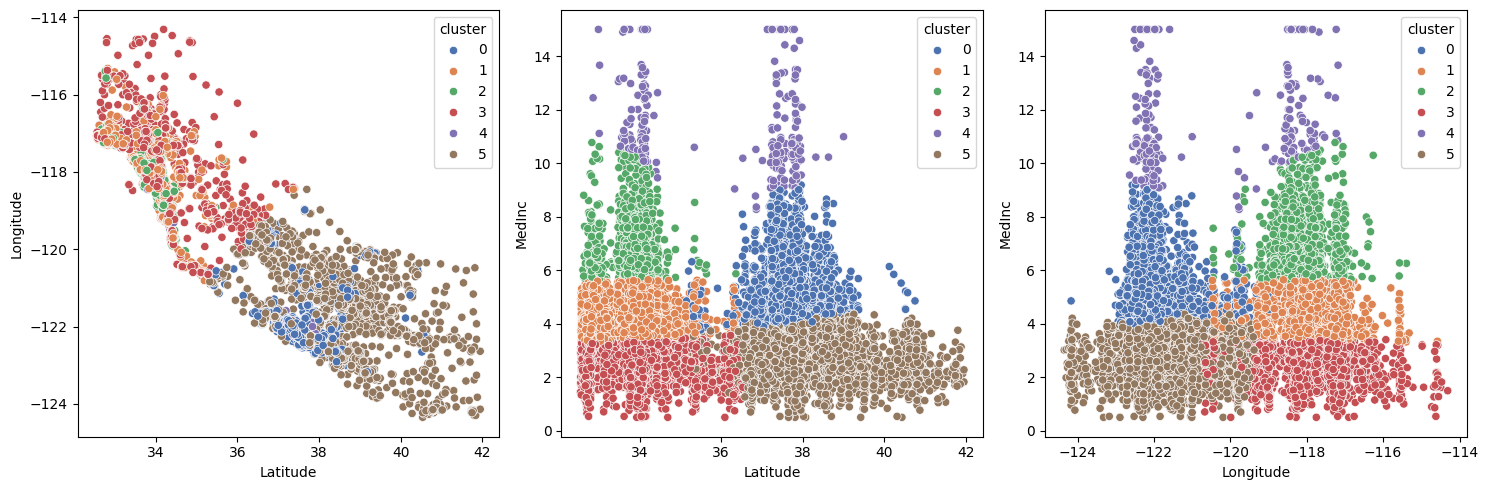

In [17]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

In [18]:
# Predecir con conjunto de test
y_test = (k_model.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


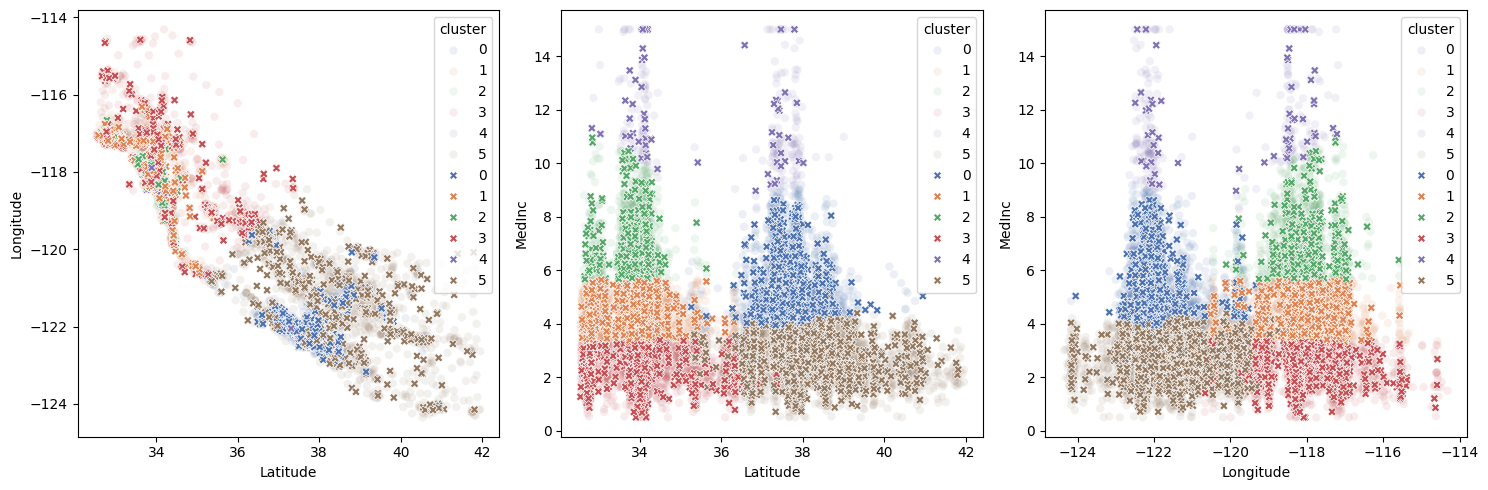

In [22]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "X")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "X")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "X")
plt.tight_layout()

plt.show()

La mayoría de los puntos del X_test se agrupan de forma correcta dentro de los clusters del X_train, lo que sugiere que el modelo generaliza bien.

In [21]:
# Entrenar un Random Forest

rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred_test = rf_model.predict(X_test)
y_pred_test

array([3, 3, 5, ..., 4, 5, 1], shape=(4128,), dtype=int32)

In [23]:
y_pred_train = rf_model.predict(X_train)

In [34]:
# Probabilidades necesarias para AUC
y_train_prob = rf_model.predict_proba(X_train)
y_test_prob = rf_model.predict_proba(X_test)

In [37]:
get_metrics(y_train, y_test, y_pred_train, y_pred_test)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.0,1.0,1.0,1.0,1.0,1.0
Test,1.0,1.0,1.0,1.0,1.0,1.0
Diferencia,0.0,0.0,0.0,0.0,0.0,0.0


El modelo Random Forest ha aprendido perfectamente los patrones generados por el clustering de K-Means.

In [39]:
from pickle import dump

dump(k_model, open("../models/k-means_default_42.sav", "wb"))
dump(rf_model, open("../models/rf-classifier_default_42.sav", "wb"))